<a href="https://colab.research.google.com/github/NahuelCostaCortez/InteligeciaNegocio/blob/main/lstm_analisis_sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Función auxiliar para visualizar el proceso de entrenamiento
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Carga de datos

In [ ]:
max_features = 20000  # Número de palabras del vocabulario
maxlen = 200  # Tamaño máximo de palabras de cada review

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print("Número de secuencias de train:", len(x_train))
print("Número de secuencias de validación:", len(x_val))
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

Número de secuencias de train: 25000
Número de secuencias de validación: 25000


## Entrenamiento del modelo

Modelo con una capa LSTM

In [ ]:
# Capa de entrada
inputs = keras.Input(shape=(None,), dtype="int32")
# Capa de embedding - OJO: aquí la estamos aprendiendo, no es pre-entrenada!
x = layers.Embedding(max_features, 128)(inputs)
# Añadimos una capa LSTM
x = layers.LSTM(64)(x)
# Capa de salida, 1 neurona para predecir el tipo de review: positiva o negativa
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,609,473
Trainable params: 2,609,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
782/782 [==============================] - 14s 16ms/step - loss: 0.3790 - accuracy: 0.8308 - val_loss: 0.3076 - val_accuracy: 0.8726
Epoch 2/10
782/782 [==============================] - 12s 16ms/step - loss: 0.2062 - accuracy: 0.9223 - val_loss: 0.3295 - val_accuracy: 0.8706
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1421 - accuracy: 0.9499 - val_loss: 0.3904 - val_accuracy: 0.8290
Epoch 4/10
782/782 [==============================] - 16s 20ms/step - loss: 0.1006 - accuracy: 0.9649 - val_loss: 0.5381 - val_accuracy: 0.8562
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0714 - accuracy: 0.9755 - val_loss: 0.4608 - val_accuracy: 0.8563
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0571 - accuracy: 0.9803 - val_loss: 0.5043 - val_accuracy: 0.8506
Epoch 7/10
782/782 [==============================] - 13s 16ms/step - loss: 0.0390 - accuracy: 0.9878 - val_loss: 0.5651 - val_accuracy:

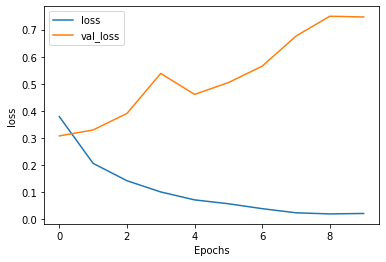

In [ ]:
plot_graphs(history, 'loss')

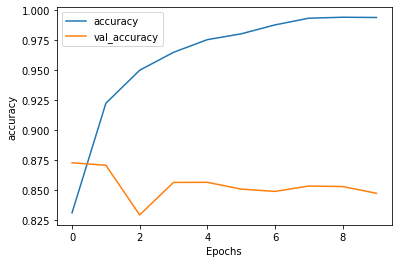

In [ ]:
plot_graphs(history, 'accuracy')

El error de train es prácticamente 0 y el de validación aumenta en lugar de disminuir -> esto significa que la red está sobreajustando los datos (**overfitting**)

Vamos a añadir capas Dropout para prevenir esto.

Las capas Dropout desactivan conexiones aleatoriamente entre las neuronas. De esta manera se evita que la red memorice los datos y generalice mejor en inferencia.

In [ ]:
# Capa de entrada
inputs = keras.Input(shape=(None,), dtype="int32")
# Capa de embedding - OJO: aquí la estamos aprendiendo, no es pre-entrenada!
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Dropout(0.6)(x)
# Añadimos una capa LSTM con dropout
x = layers.LSTM(64, dropout=0.6)(x)
x = layers.Dropout(0.6)(x)
# Capa de salida, 1 neurona para predecir el tipo de review: positiva o negativa
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_13 (Embedding)    (None, None, 128)         2560000   
                                                                 
 dropout_10 (Dropout)        (None, None, 128)         0         
                                                                 
 lstm_13 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,609,473
Trainable params: 2,609,473
Non-tra

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=8, validation_data=(x_val, y_val))

Epoch 1/8
782/782 [==============================] - 16s 18ms/step - loss: 0.4612 - accuracy: 0.7756 - val_loss: 0.3296 - val_accuracy: 0.8593
Epoch 2/8
782/782 [==============================] - 14s 17ms/step - loss: 0.3012 - accuracy: 0.8818 - val_loss: 0.3497 - val_accuracy: 0.8592
Epoch 3/8
782/782 [==============================] - 13s 16ms/step - loss: 0.2407 - accuracy: 0.9098 - val_loss: 0.3050 - val_accuracy: 0.8741
Epoch 4/8
782/782 [==============================] - 14s 18ms/step - loss: 0.2044 - accuracy: 0.9241 - val_loss: 0.3233 - val_accuracy: 0.8754
Epoch 5/8
782/782 [==============================] - 15s 19ms/step - loss: 0.1818 - accuracy: 0.9325 - val_loss: 0.3008 - val_accuracy: 0.8766
Epoch 6/8
782/782 [==============================] - 14s 18ms/step - loss: 0.1665 - accuracy: 0.9391 - val_loss: 0.4017 - val_accuracy: 0.8622
Epoch 7/8
782/782 [==============================] - 15s 19ms/step - loss: 0.1467 - accuracy: 0.9464 - val_loss: 0.3217 - val_accuracy: 0.8694

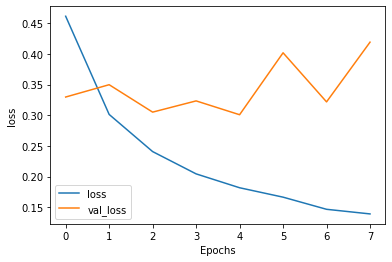

In [ ]:
plot_graphs(history, 'loss')

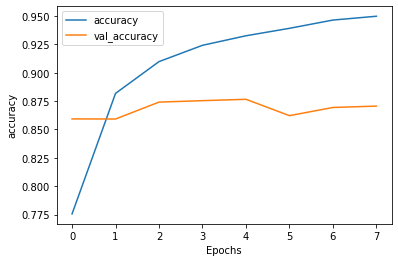

In [ ]:
plot_graphs(history, 'accuracy')

Algo mejora pero no lo suficiente. A partir de la epoch 4 vuelve a haber overfitting. Esto puede significar:


*   La red no es capaz de generalizar mejor independientemente de que haya o no sobreajuste
*   Los datos de train no son lo suficientemente representativos como para reflejar el comportamiento de los datos de validación
*  Se necesita un mejor ajuste de hiperparámetros (tamaño del vocabulario, batch_size, tasa de dropout...)



Modelo con capas Bidirectional

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-tra

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
782/782 [==============================] - 40s 45ms/step - loss: 0.4064 - accuracy: 0.8142 - val_loss: 0.3500 - val_accuracy: 0.8523
Epoch 2/10
782/782 [==============================] - 34s 43ms/step - loss: 0.2791 - accuracy: 0.8858 - val_loss: 0.3474 - val_accuracy: 0.8564
Epoch 3/10
782/782 [==============================] - 34s 43ms/step - loss: 0.1883 - accuracy: 0.9304 - val_loss: 0.3542 - val_accuracy: 0.8567
Epoch 4/10
782/782 [==============================] - 33s 42ms/step - loss: 0.1132 - accuracy: 0.9608 - val_loss: 0.3996 - val_accuracy: 0.8583
Epoch 5/10
782/782 [==============================] - 33s 42ms/step - loss: 0.0742 - accuracy: 0.9747 - val_loss: 0.4488 - val_accuracy: 0.8523
Epoch 6/10
782/782 [==============================] - 33s 42ms/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.4900 - val_accuracy: 0.8488
Epoch 7/10
782/782 [==============================] - 33s 42ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.5993 - val_accuracy:

## Probar el modelo en inferencia

[Demo del modelo](https://huggingface.co/spaces/keras-io/bidirectional_lstm_imdb)